In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import time
import os
import cv2
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [ ]:
#path to data
#path ="C:/Users/Asus/Desktop/Drive Chouchen Karim/Semestre4 SySco/DATA SCIENCE/Projet/DATA/lake picture"
path="C:/Users/Asus/Desktop/lake picture"
xlpath="C:/Users/Asus/Desktop/Drive Chouchen Karim/Semestre4 SySco/DATA SCIENCE/Projet/DATA"
#data importation
interval=np.linspace(0,80000,161)
data=pd.read_excel(os.path.join(xlpath,os.listdir(xlpath)[1]))
volume=data['Volume']
#defining the catégories
categories=[]
for i in range(len(interval)-1):
    categories.append([interval[i],interval[i+1]])

(27, 128, 128, 3)


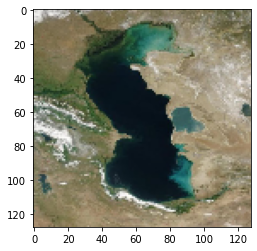

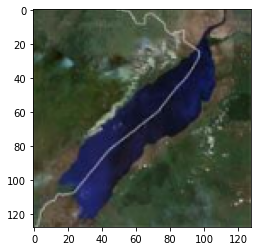

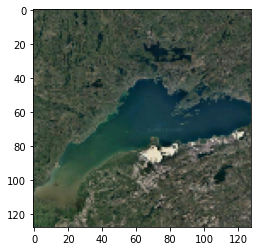

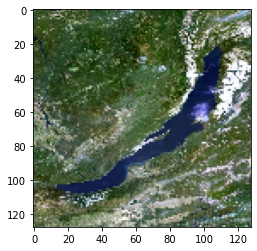

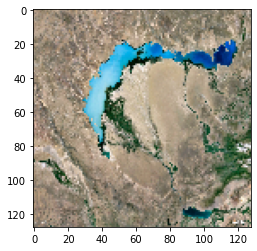

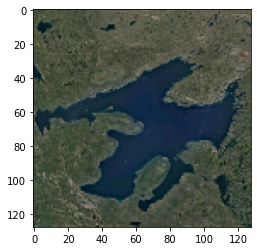

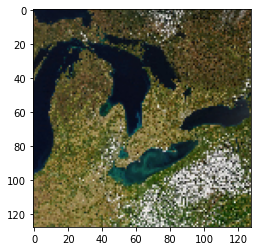

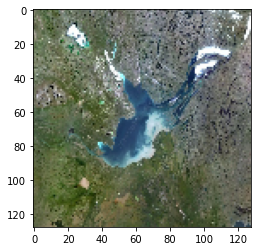

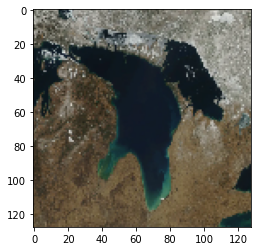

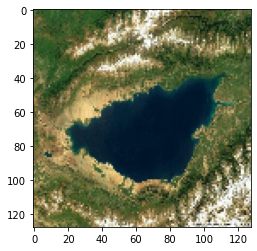

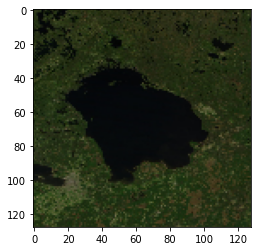

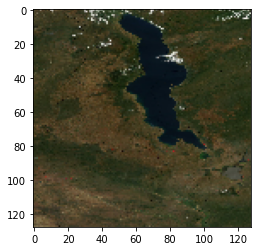

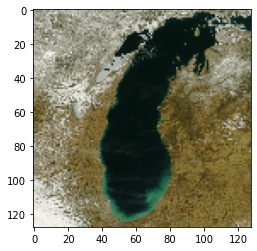

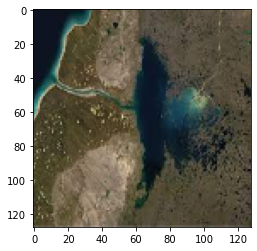

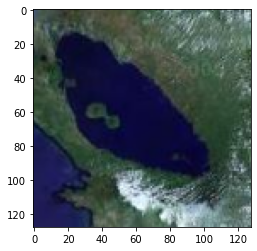

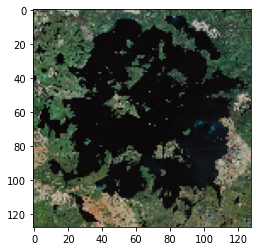

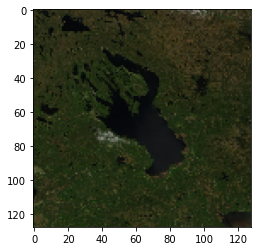

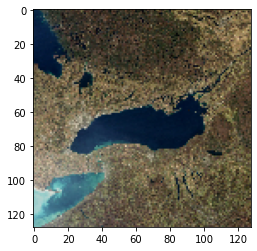

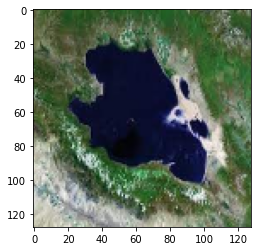

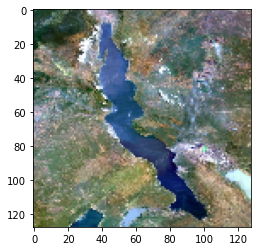

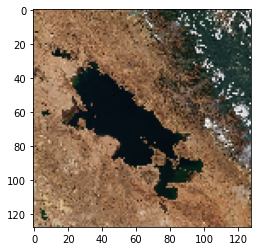

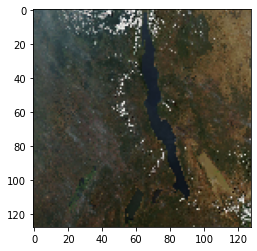

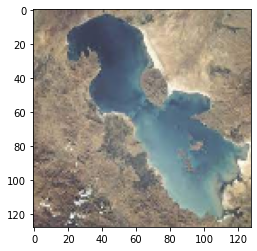

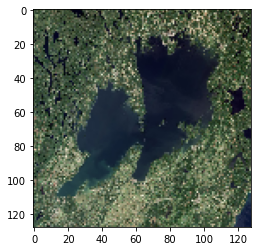

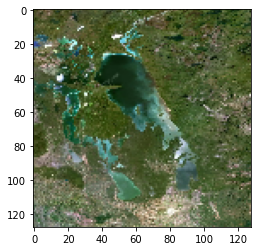

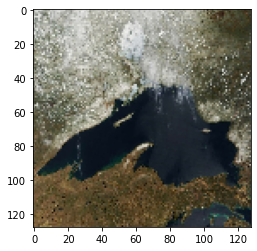

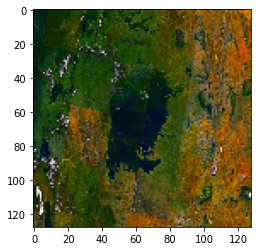

In [ ]:
#pics importation  
img_input=[]
img_data_list=[]
img_list=os.listdir(path)
for img in img_list:  # iterate over each image per lake    
        #img_path=path+'/'+img
        #img_path=os.path.join(path,img)
        img_array=cv2.imread(path+'/'+img)
        array1=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        input_img_resize=cv2.resize(array1,(128,128))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)
#for i in range(len(img_data_list)):
#    plt.imshow(img_data_list[i])  # graph it
#    plt.show()
for i in range(len(img_data)):
    plt.imshow(img_data[i])  # graph it
    plt.show()

In [ ]:
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples, 1))#,dtype='int64')
#labels=[]
#labels.append('[0,500]')
labels[0]=11
labels[1]=0
labels[2]=0
labels[3]=10
labels[4]=0
labels[5]=3
labels[6]=0
labels[7]=2
labels[8]=5
labels[9]=2
labels[10]=1
labels[11]=7
labels[12]=6
labels[13]=0
labels[14]=0
labels[15]=0
labels[16]=0
labels[17]=2
labels[18]=0
labels[19]=9
labels[20]=1
labels[21]=0
labels[22]=4
labels[23]=0
labels[24]=0
labels[25]=8
labels[26]=4
print(labels)

[[11.]
 [ 0.]
 [ 0.]
 [10.]
 [ 0.]
 [ 3.]
 [ 0.]
 [ 2.]
 [ 5.]
 [ 2.]
 [ 1.]
 [ 7.]
 [ 6.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 0.]
 [ 9.]
 [ 1.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 0.]
 [ 8.]
 [ 4.]]


In [ ]:
Y=np_utils.to_categorical(labels,161)
x,y=shuffle(img_data,Y,random_state=2)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#padding='same',
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(128,128,3)))  
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(161))
model.add(Activation('softmax'))

In [ ]:
##Model création
#model = Sequential()
#model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=(100,100,3)))
#model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D((2, 2), strides=(2, 2)))###

#model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
#model.add(Conv2D(64, kernel_size=(3, 3), activation='sigmoid'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D((2, 2), strides=(2, 2)))

#model.add(Flatten())
#model.add(Dropout(0.5))
##the classifier
#model.add(Dense(10, activation='softmax'))

#model.summary() 

In [ ]:
#model compiling
model.compile(loss=keras.losses.MeanSquaredError(),optimizer='rmsprop', metrics=['accuracy'])
#help(keras.models.Sequential().fit)

In [ ]:
#training
#x=training data

#hist=model.fit(X_train,y_train, batch_size=64,epochs=30,verbose=1,validation_data=(X_test,y_test))
#hist=model.fit(x,y,epochs=30)
#X_train = tf.stack(X_train)
#y_train = tf.stack(y_train)



hist = model.fit(X_train, y_train, batch_size=64, epochs=30, verbose=1, validation_data=(X_test, y_test))


Epoch 1/30
1/1 [==============================] - 13s 13s/step - loss: 0.0062 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.6667
Epoch 2/30
1/1 [==============================] - 3s 3s/step - loss: 0.0064 - accuracy: 0.2857 - val_loss: 0.0060 - val_accuracy: 0.6667
Epoch 3/30
1/1 [==============================] - 3s 3s/step - loss: 0.0060 - accuracy: 0.2381 - val_loss: 0.0060 - val_accuracy: 0.6667
Epoch 4/30
1/1 [==============================] - 3s 3s/step - loss: 0.0058 - accuracy: 0.2381 - val_loss: 0.0062 - val_accuracy: 0.6667
Epoch 5/30
1/1 [==============================] - 4s 4s/step - loss: 0.0061 - accuracy: 0.3333 - val_loss: 0.0062 - val_accuracy: 0.6667
Epoch 6/30
1/1 [==============================] - 5s 5s/step - loss: 0.0061 - accuracy: 0.1905 - val_loss: 0.0061 - val_accuracy: 0.6667
Epoch 7/30
1/1 [==============================] - 4s 4s/step - loss: 0.0060 - accuracy: 0.2857 - val_loss: 0.0058 - val_accuracy: 0.6667
Epoch 8/30
1/1 [===================

In [ ]:
train_score = model.evaluate(X_train, y_train, verbose=1)
print('Train Loss:', train_score[0])
print('Train accuracy:', train_score[1])
test_score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', test_score[0])
print('Test accuracy:', test_score[1])


1/1 [==============================] - 1s 778ms/step - loss: 0.0050 - accuracy: 0.3810
Train Loss: 0.004961955826729536
Train accuracy: 0.380952388048172
1/1 [==============================] - 0s 309ms/step - loss: 0.0047 - accuracy: 0.6667
Test Loss: 0.004684860352426767
Test accuracy: 0.6666666865348816


In [ ]:
# Testing a new image
test_image = cv2.imread('C:/Users/Asus/Desktop/Drive Chouchen Karim/Semestre4 SySco/DATA SCIENCE/Projet/DATA/lake picture/lake_Superior.jpg')

test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

#if num_channel==1:
#    if K.image_data_format()=='channels_first':
#        test_image= np.expand_dims(test_image, axis=0)
#        test_image= np.expand_dims(test_image, axis=0)
#        print (test_image.shape)
#    else:
#        test_image= np.expand_dims(test_image, axis=3)
#        test_image= np.expand_dims(test_image, axis=0)
#        print (test_image.shape)
#else:
#    if K.image_data_format()=='channels_first':
#        test_image=np.rollaxis(test_image,2,0)
#        test_image= np.expand_dims(test_image, axis=0)
#        print (test_image.shape)
#    else:
#        test_image= np.expand_dims(test_image, axis=0)
#        print (test_image.shape)


(128, 128, 3)


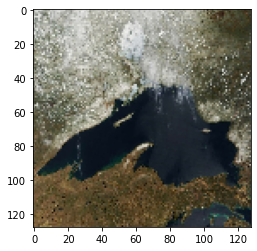

In [ ]:
plt.imshow(test_image,cmap='gray')


In [ ]:
#model.evaluate(test_image,np.array([0.23]))
model.evaluate(X_test,y_test)
#model.predict(test_image)
#print(dict(zip(categories, np.squeeze(model.predict(test_image)))))
#np.squeeze(model.predict(test_image))


1/1 [==============================] - 0s 303ms/step - loss: 0.0047 - accuracy: 0.6667


[0.004684860352426767, 0.6666666865348816]

In [ ]:
X_test.shape

In [ ]:
tf.math.argmax(model.predict(X_test),axis = 1)

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0], dtype=int64)>

In [ ]:
tf.math.argmax(model.predict(np.expand_dims(test_image, axis = 0)),axis = 1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0], dtype=int64)>